# OwlViT test

In [1]:
import sys
import os
import torch
from PIL import Image

current_dir = os.getcwd()
# Navigate up one directory to get the correct path
sys.path.insert(0, os.path.abspath(os.path.join(current_dir, "..", "src")))

from detection_module.owlv2 import Owlv2
from detection_module.utils import calculate_iou, show_images


## Image Visualization

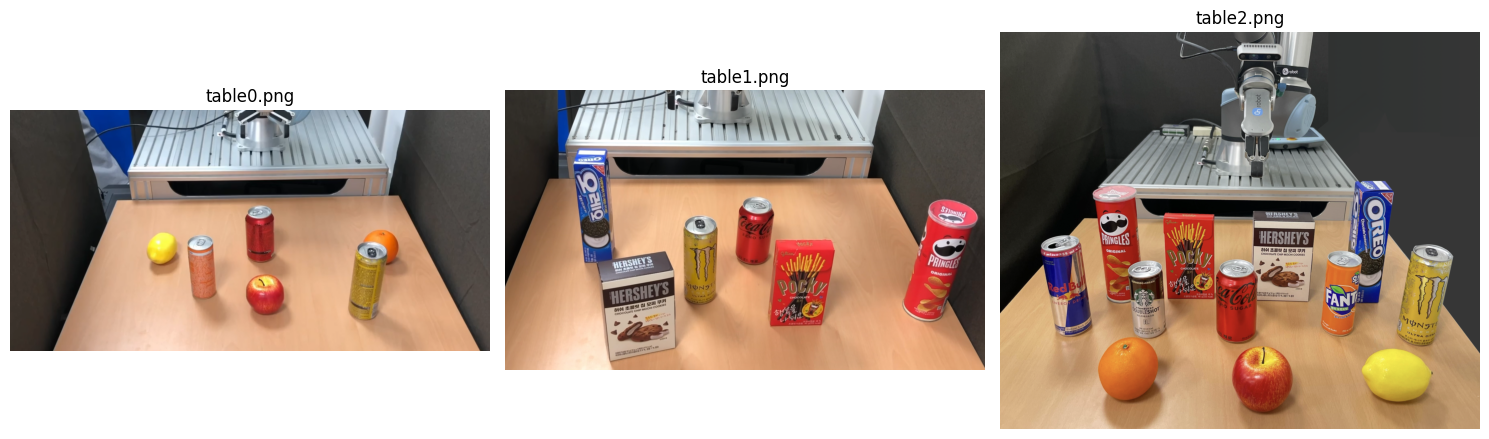

In [2]:
image_dir = "../data/images"
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
image_paths = sorted(image_paths)
images = [Image.open(img).convert("RGB") for img in image_paths]
titles = [os.path.basename(img_path) for img_path in image_paths]

# Show images using the utility function
show_images(images, titles)

## Owlv2 Inferenece

Let's define sample image dict first

In [3]:
samples = {
    'table0': {
        'image': images[0],
        'text': ["an apple", "an orange can", "a red can", "a yellow can. a lemon. an orange"],
    },
    'table1': {
        'image': images[1],
        'text': ["an Oreo cookie box", "a Hershey's chocolate box", "a Monster can", "a Pocky box", "a Coca-Cola can", "a Pringles can"],
    },
    'table2': {
        'image': images[2],
        'text': ["a Red Bull can", "a Pringles can", "a Pocky box", "a Starbucks can", "a Coca-Cola can", "a Hershey's chocolate box", "an Oreo cookie box", "a Monster can", "a Orange Fanta can. an apple", "an orange", "a lemon"],
    },
}

In [4]:
# load model 
owlvit = Owlv2()

detection_results = []
for sample in samples.values():
    # inference
    sample['box_threshold'] = 0.3
    result = owlvit.detect_objects(**sample)[0]
    detection_results.append(result)

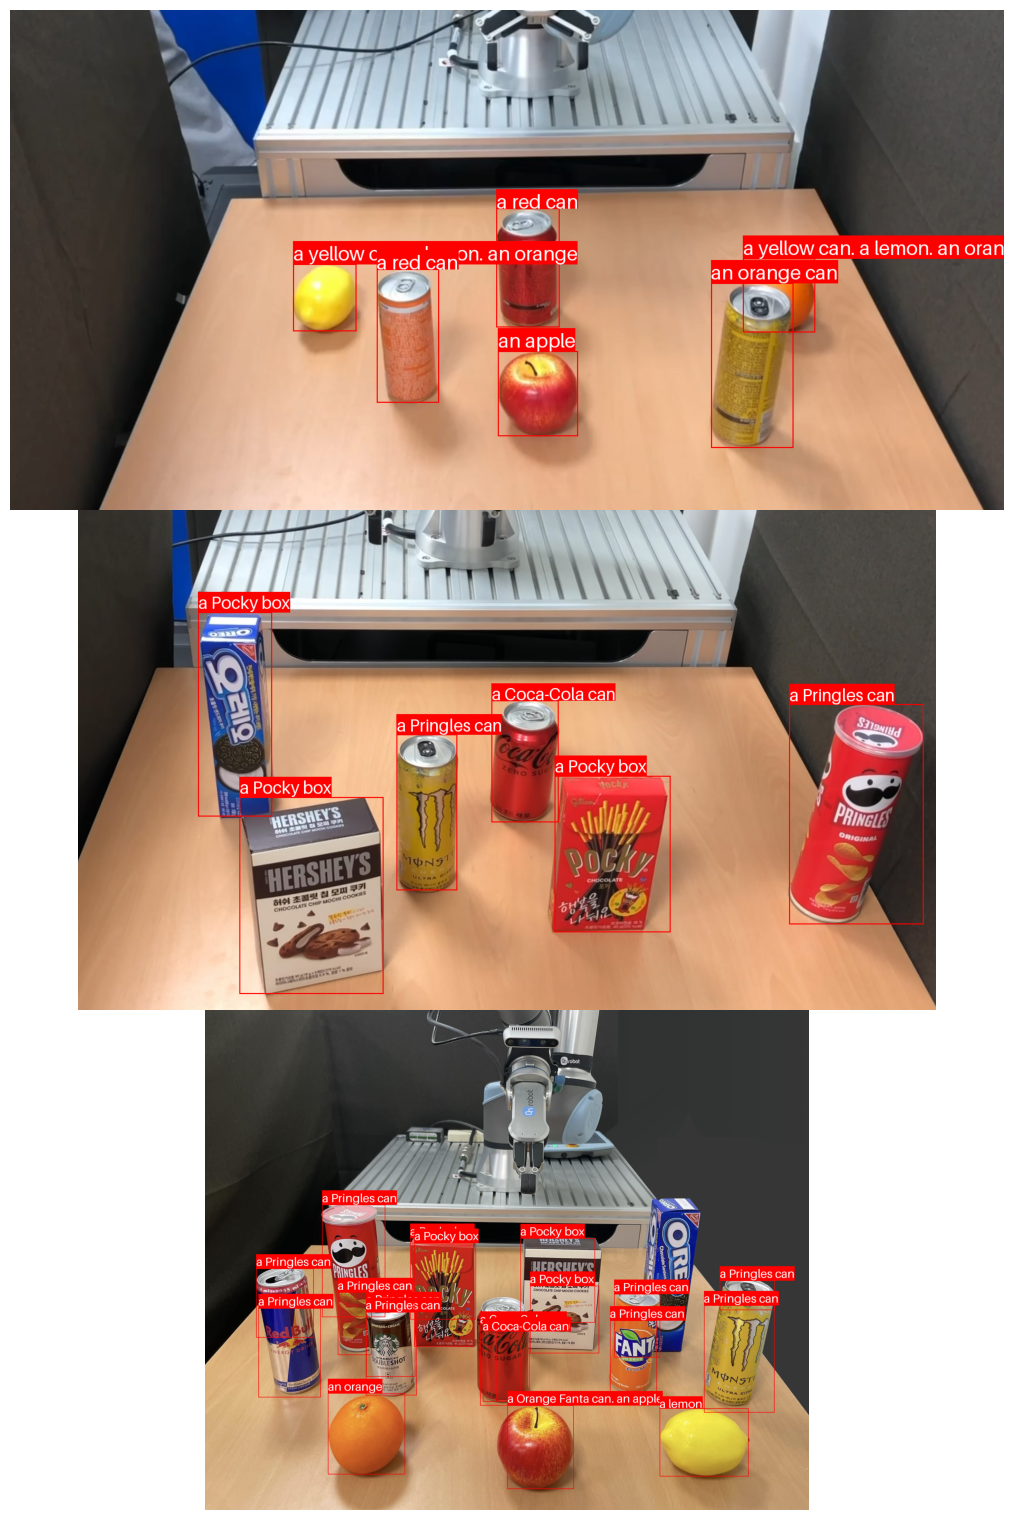

In [5]:
import matplotlib.pyplot as plt

def show_images_with_bboxes(images, detection_results):
    fig, axs = plt.subplots(len(images), 1, figsize=(10, len(images) * 5))
    
    for ax, img, result, sample in zip(axs, images, detection_results, samples.values()):
        img = img.copy()

        boxes = result['boxes']
        labels = [sample['text'][idx] for idx in result['labels'].tolist()]
        img = owlvit.draw_boxes(img, boxes, labels)

        ax.imshow(img)
        ax.axis('off')

    plt.subplots_adjust(hspace=0.1, top=1, bottom=0, left=0, right=1)
    plt.tight_layout(pad=0)
    plt.show()


show_images_with_bboxes(images, detection_results)